<a href="https://colab.research.google.com/github/george-kan/fastai/blob/main/Doggies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/kaggle"
!kaggle competitions download dog-breed-identification
!unzip "/content/dog-breed-identification"

In [3]:
!pip install --upgrade fastai
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.vision.all import *
from fastai import *
!pip install nbdev

     |████████████████████████████████| 51kB 7.7MB/s 


In [4]:
labels = pd.read_csv('/content/labels.csv')
def label_func(fname):
    return labels.loc[labels.id == fname.name[:-4], 'breed'].item()

path = Path('/content/train/')

In [ ]:
labels.groupby('breed').size().nsmallest(10)

breed
briard               66
eskimo_dog           66
brabancon_griffon    67
golden_retriever     67
komondor             67
german_shepherd      69
giant_schnauzer      69
otterhound           69
tibetan_mastiff      69
walker_hound         69
dtype: int64

In [5]:
import random
random.seed(42)
removed_samples = random.sample(path.ls(), 7000)
for doggie in removed_samples:
    doggie.unlink()

In [6]:
path.ls()

(#3222) [Path('/content/train/b7a588fd384c51e3cc07b16caa84239d.jpg'),Path('/content/train/8898c34ad05d2c95319ff2a2f326e69c.jpg'),Path('/content/train/b047a2436ec6f415212fe82f4eb5bfa2.jpg'),Path('/content/train/104f3118ce7eba3e48138ccaa201f25a.jpg'),Path('/content/train/45a71277ce6c512356b8968ea6bc2d5d.jpg'),Path('/content/train/fee98c990f4d69c6a8467dd0f0668440.jpg'),Path('/content/train/eb2f7c626e517b63a1fc07577d8db675.jpg'),Path('/content/train/55d7b47125918892a35998297887ded3.jpg'),Path('/content/train/1ee3b516f4a905b04ef9c409056fcfd4.jpg'),Path('/content/train/9c88de8027c36fc397daf2ca403e14ef.jpg')...]

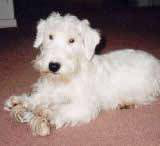

In [ ]:
Image.open(path.ls()[1002])

In [ ]:
timg = TensorImage(array(Image.open(path.ls()[1002]))).permute(2,0,1).float()/255.
def _batch_ex(bs): return TensorImage(timg[None].expand(bs, *timg.shape).clone())

aug_transforms(mult=1.0, do_flip=True, flip_vert=False, max_rotate=10.0, min_zoom=1.0, max_zoom=1.1, 
               max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, xtra_tfms=None, 
               size=None, mode='bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0)

Random flip (or dihedral if flip_vert=True) with p=0.5 is added when do_flip=True. With p_affine we apply a random 
rotation of max_rotate degrees, a random zoom between min_zoom and max_zoom and a perspective warping of max_warp. 
With p_lighting we apply a change in brightness and contrast of max_lighting. Custon xtra_tfms can be added. size, 
mode and pad_mode will be used for the interpolation. max_rotate,max_lighting,max_warp are multiplied by mult so you 
can more easily increase or decrease augmentation with a single parameter.

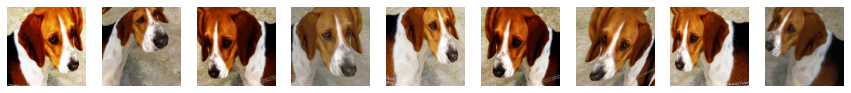

In [ ]:
tfms = aug_transforms(pad_mode='reflection', mult=2, xtra_tfms=[RandomResizedCropGPU(125)])
y = _batch_ex(9)
for t in tfms: y = t(y, split_idx=0)
_,axs = plt.subplots(1,9, figsize=(15,10))
for i,ax in enumerate(axs.flatten()): show_image(y[i], ctx=ax)

In [ ]:
y

RandomResizedCrop -- {'size': (TensorImage([[[4.5206e-01, 4.7499e-01, 4.9373e-01,  ..., 3.0750e-01,
          3.0143e-01, 3.1421e-01],
         [4.2669e-01, 4.5211e-01, 4.8710e-01,  ..., 3.0615e-01,
          3.1750e-01, 3.3589e-01],
         [4.0304e-01, 4.1786e-01, 4.5245e-01,  ..., 3.1656e-01,
          3.2340e-01, 3.4489e-01],
         ...,
         [3.0520e-02, 2.6445e-02, 1.5973e-02,  ..., 1.5304e-01,
          1.3332e-01, 1.5452e-01],
         [3.3657e-02, 3.3772e-02, 1.2738e-02,  ..., 2.2774e-01,
          1.8762e-01, 1.9813e-01],
         [2.6781e-02, 3.2725e-02, 2.0027e-02,  ..., 3.4160e-01,
          3.0083e-01, 2.4320e-01]],

        [[4.0501e-01, 4.2620e-01, 4.4345e-01,  ..., 1.2062e-01,
          1.1698e-01, 1.3037e-01],
         [3.8142e-01, 4.0505e-01, 4.3736e-01,  ..., 1.2259e-01,
          1.3392e-01, 1.5049e-01],
         [3.5932e-01, 3.7318e-01, 4.0536e-01,  ..., 1.3370e-01,
          1.3981e-01, 1.5816e-01],
         ...,
         [2.1951e-02, 9.7774e-03, 7.3469e-0

In [ ]:
tfms

[Flip -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'zeros', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5}:
 encodes: (TensorImage,object) -> encodes
 (TensorMask,object) -> encodes
 (TensorBBox,object) -> encodes
 (TensorPoint,object) -> encodes
 decodes: ,
 Brightness -- {'max_lighting': 0.4, 'p': 1.0, 'draw': None, 'batch': False}:
 encodes: (TensorImage,object) -> encodes
 decodes: ,
 RandomResizedCropGPU -- {'size': None, 'min_scale': 0.5, 'ratio': (1, 1), 'mode': 'bilinear', 'valid_scale': 1.0, 'p': 1.0}:
 encodes: (TensorImage,object) -> encodes
 decodes: ]

In [23]:
def get_dls(bs, size):
    dogs = DataBlock(blocks = (ImageBlock, CategoryBlock),
                    get_items = get_image_files,
                    splitter = RandomSplitter(valid_pct=0.2, seed = 42),
                    get_y = label_func,
                    item_tfms = Resize(460),
                    batch_tfms = [*aug_transforms(size=size, min_scale=0.75), Normalize])
    return dogs.dataloaders(path, bs=bs)

dls = get_dls(64, 224)
#dls = dogs.dataloaders(temp_path, batch_size = 150)
#batch_tfms = aug_transforms(size=224, mult=2, min_scale=0.5))

In [20]:
doc(Normalize.from_stats)

In [24]:
x,y = dls.one_batch()
x.mean(dim=[0,2,3]), x.std(dim=[0,2,3])

(TensorImage([0.0110, 0.0254, 0.0741], device='cuda:0'),
 TensorImage([0.9998, 1.0108, 1.0315], device='cuda:0'))

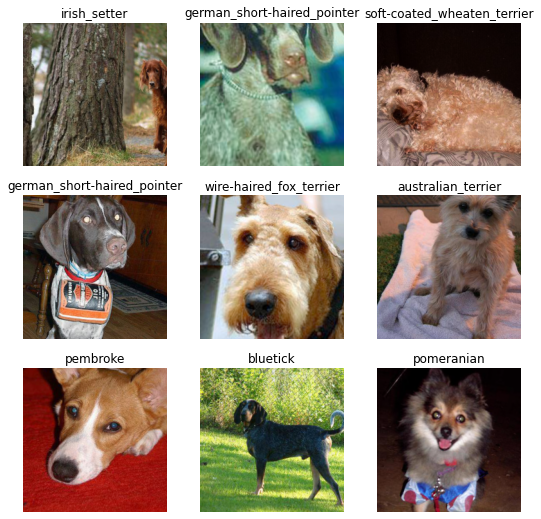

In [ ]:
dls.train.show_batch()

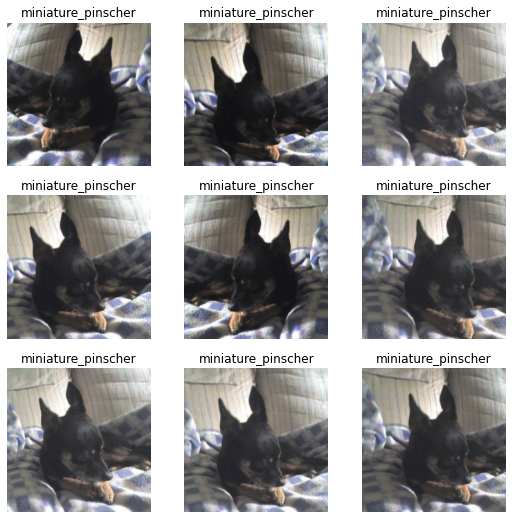

In [ ]:
dls.train.show_batch(unique= True)

In [25]:
#First try Simple fine_tune
learn = cnn_learner(dls, resnet50, metrics=accuracy).to_fp16()
learn.fine_tune(12, 3e-3)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,time
0,3.323617,0.910495,0.728261,00:30


epoch,train_loss,valid_loss,accuracy,time
0,0.985635,0.681951,0.795031,00:30
1,0.728822,0.749624,0.784162,00:30
2,0.649836,1.053329,0.717391,00:30
3,0.629664,1.108900,0.698758,00:30
4,0.568385,1.185381,0.686335,00:31
5,0.439284,1.104355,0.739130,00:30
6,0.325538,0.929486,0.767081,00:31
7,0.231607,0.967727,0.751553,00:31
8,0.162515,0.895453,0.763975,00:31
9,0.108686,0.906666,0.776398,00:30


In [26]:
#Second try Fit the new layer first and then unfreeze
learn = cnn_learner(dls, resnet50, metrics=accuracy).to_fp16()
learn.fit_one_cycle(6, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.674047,1.050872,0.667702,00:29
1,1.904995,0.974127,0.726708,00:29


KeyboardInterrupt: ignored

SuggestedLRs(lr_min=1.737800812406931e-06, lr_steep=1.9054607491852948e-06)

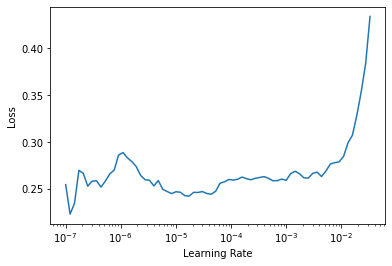

In [ ]:
learn.lr_find()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(6, lr_max = 1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.272228,0.691818,0.787267,00:31
1,0.312595,0.945529,0.759317,00:31
2,0.288556,0.901467,0.760870,00:31
3,0.247946,0.792813,0.777950,00:31
4,0.198757,0.761960,0.777950,00:31
5,0.152316,0.755238,0.779503,00:31


In [ ]:
# Third try Fit with small pictures first and then 
dls = get_dls(128, 128)
learn = cnn_learner(dls, resnet50, metrics=accuracy).to_fp16()
learn.fit_one_cycle(6, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.888354,2.217822,0.475155,00:27
1,3.107110,1.415984,0.608696,00:27
2,2.193520,1.307692,0.652174,00:26
3,1.631391,1.188078,0.678571,00:27
4,1.260087,1.150440,0.683230,00:27
5,1.016463,1.150067,0.673913,00:26


SuggestedLRs(lr_min=0.0009120108559727668, lr_steep=4.786300905834651e-06)

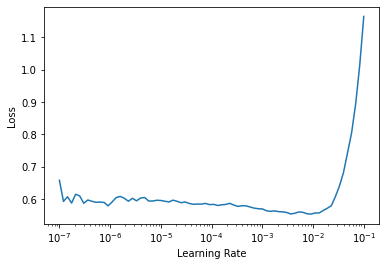

In [ ]:
learn.lr_find()

In [ ]:
learn.dls = get_dls(64, 224)
learn.unfreeze()
learn.fit_one_cycle(6, lr_max = slice(1e-5, 3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.648786,0.701679,0.781056,00:31
1,0.542289,0.661099,0.795031,00:30
2,0.442155,0.702247,0.796584,00:31
3,0.341015,0.684722,0.804348,00:31
4,0.268485,0.663709,0.802795,00:31
5,0.227543,0.662466,0.804348,00:31


In [ ]:
#Fourth try Switching the transformations
dogs = DataBlock(blocks = (ImageBlock, CategoryBlock),
                get_items = get_image_files,
                splitter = RandomSplitter(valid_pct=0.2, seed = 42),
                get_y = label_func,
                item_tfms = Resize(460),
                batch_tfms = aug_transforms(size=224, min_scale=0.75, mult = 2))

dls = dogs.dataloaders(path)
learn = cnn_learner(dls, resnet50, metrics=accuracy).to_fp16()
learn.fine_tune(12, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.534257,1.080064,0.689441,00:30


epoch,train_loss,valid_loss,accuracy,time
0,1.282443,0.738903,0.777950,00:31
1,1.060670,0.808407,0.743789,00:31
2,0.950462,1.025933,0.700311,00:30
3,0.892563,1.097261,0.704969,00:30
4,0.792765,1.089344,0.708075,00:31
5,0.668825,1.107206,0.706522,00:30
6,0.527926,1.053522,0.717391,00:31
7,0.394121,0.935808,0.746894,00:30
8,0.289088,0.882473,0.759317,00:30
9,0.222234,0.853663,0.760870,00:31


In [ ]:
#Fifth try Switching the transformations and train with step and unfreeze
dogs = DataBlock(blocks = (ImageBlock, CategoryBlock),
                get_items = get_image_files,
                splitter = RandomSplitter(valid_pct=0.2, seed = 42),
                get_y = label_func,
                item_tfms = Resize(460),
                batch_tfms = aug_transforms(size=224, min_scale=0.75, mult = 2))

dls = dogs.dataloaders(path)
learn = cnn_learner(dls, resnet101, metrics=accuracy).to_fp16()
learn.fit_one_cycle(6, 3e-3)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.808208,0.705468,0.800391,01:42
1,1.314431,0.951133,0.737769,01:40
2,1.162864,0.799213,0.769080,01:41
3,0.860126,0.546492,0.831703,01:40
4,0.630331,0.459229,0.855186,01:40
5,0.496116,0.441253,0.865460,01:40


SuggestedLRs(lr_min=0.00010000000474974513, lr_steep=1.2022644114040304e-05)

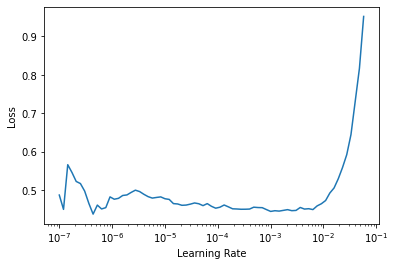

In [ ]:
learn.lr_find()

SuggestedLRs(lr_min=3.0199516913853586e-06, lr_steep=1.0964781722577754e-06)

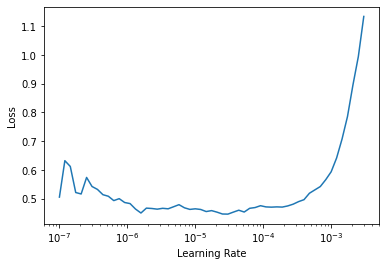

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fit_one_cycle(6, lr_max = slice(5e-7, 1e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.475960,0.435475,0.864971,01:49
1,0.486442,0.438134,0.864971,01:49
2,0.469763,0.433431,0.869374,01:48
3,0.459913,0.432528,0.865949,01:49
4,0.447004,0.433553,0.865460,01:48
5,0.465171,0.431059,0.869863,01:49


SuggestedLRs(lr_min=2.0892960694851582e-10, lr_steep=5.754399179380698e-09)

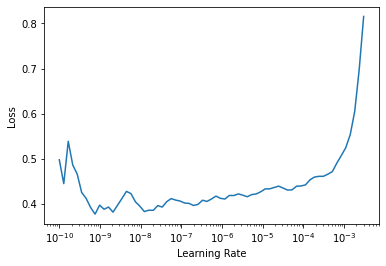

In [ ]:
learn.lr_find(start_lr=1e-10)

In [ ]:
learn.fit_one_cycle(6, lr_max = slice(2e-10, 1e-9))

epoch,train_loss,valid_loss,accuracy,time
0,0.470000,0.429257,0.867906,01:49
1,0.465041,0.431002,0.866438,01:49
2,0.467148,0.430376,0.869374,01:49
3,0.482670,0.432904,0.868885,01:49
4,0.452644,0.432160,0.870842,01:49
5,0.460007,0.431769,0.867906,01:49


SuggestedLRs(lr_min=5.754399179380698e-10, lr_steep=2.691534772836235e-09)

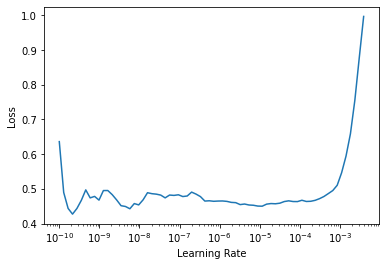

In [ ]:
learn.lr_find(start_lr=1e-10)

In [ ]:
learn.fit_one_cycle(6, lr_max = 5e-10)

epoch,train_loss,valid_loss,accuracy,time
0,0.461924,0.437328,0.865460,01:49
1,0.453134,0.430272,0.870352,01:49
2,0.453627,0.429859,0.866928,01:50
3,0.457923,0.434292,0.867906,01:50
4,0.452193,0.431816,0.863992,01:49
5,0.463890,0.431923,0.870842,01:49


In [63]:
#Sixth try Using xresnet
def get_dls(bs):
    dogs = DataBlock(blocks = (ImageBlock, CategoryBlock),
                    get_items = get_image_files,
                    splitter = RandomSplitter(valid_pct=0.2, seed = 42),
                    get_y = label_func,
                    item_tfms = Resize(299),
                    batch_tfms = [*aug_transforms(min_scale=0.75), Normalize])
    return dogs.dataloaders(path, bs=bs)
import torchvision.models as TorchModels
dls = get_dls(32)
sz=299 # image size for Inception-V3
inceptionModel = TorchModels.inception_v3(pretrained=True)

num_ftrs = inceptionModel.AuxLogits.fc.in_features
inceptionModel.AuxLogits.fc = nn.Linear(num_ftrs, dls.c)

num_ftrs = inceptionModel.fc.in_features
inceptionModel.fc = nn.Linear(num_ftrs, dls.c)
learn = Learner(dls,inceptionModel, loss_func = my_loss, metrics=accuracy)

In [64]:
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: ignored

In [32]:
dls.c

120

In [34]:
def my_loss(preds,target):
 a,b = preds
 return F.cross_entropy(a,target)

In [ ]:
#Seventh try Using inception models
dogs = DataBlock(blocks = (ImageBlock, CategoryBlock),
                get_items = get_image_files,
                splitter = RandomSplitter(valid_pct=0.2, seed = 42),
                get_y = label_func,
                item_tfms = Resize(460),
                batch_tfms = aug_transforms(size=299, min_scale=0.75, mult = 2))

dls = dogs.dataloaders(path)
import torchvision.models as TorchModels
inceptionModel = TorchModels.inception_v3(pretrained=True)
inceptionModel = inceptionModel.cuda()
num_ftrs =inceptionModel.AuxLogits.fc.in_features
inceptionModel.AuxLogits.fc = nn.Linear(num_ftrs, dls.c)

num_ftrs = inceptionModel.fc.in_features
inceptionModel.fc = nn.Linear(num_ftrs, dls.c)

learn = Learner(dls,inceptionModel,loss_func=CrossEntropyLossFlat(),metrics=accuracy).to_fp16()
learn.fit_one_cycle(1)

Could not do one pass in your dataloader, there is something wrong in it


epoch,train_loss,valid_loss,accuracy,time


RuntimeError: ignored

In [ ]:
#Eightth try Switching the transformations and train with step and unfreeze
dogs = DataBlock(blocks = (ImageBlock, CategoryBlock),
                get_items = get_image_files,
                splitter = RandomSplitter(valid_pct=0.2, seed = 42),
                get_y = label_func,
                item_tfms = Resize(460),
                batch_tfms = aug_transforms(size=224, min_scale=0.75, mult = 2))

dls = dogs.dataloaders(path, bs = 120)
learn = cnn_learner(dls, resnet50, metrics=accuracy).to_fp16()
learn.fit_one_cycle(9, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.916657,1.526321,0.604037,00:29
1,2.865202,0.776766,0.748447,00:29
2,1.958113,0.779867,0.767081,00:29
3,1.462486,0.812389,0.757764,00:29
4,1.124712,0.653128,0.795031,00:29
5,0.886438,0.645839,0.788820,00:29
6,0.711951,0.623277,0.804348,00:29
7,0.577056,0.601009,0.804348,00:29
8,0.490501,0.595029,0.810559,00:29


In [ ]:
dls = get_dls(62, 224)

In [ ]:
learn.loss_func = LabelSmoothingCrossEntropy()

SuggestedLRs(lr_min=2.7542287716642023e-05, lr_steep=1.9054607491852948e-06)

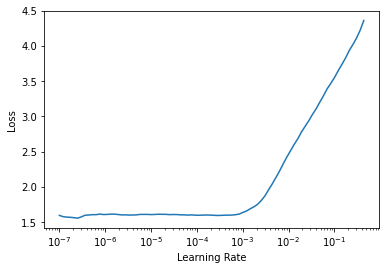

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fit_one_cycle(50, lr_max = 1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,1.504645,1.722347,0.796584,00:30
1,1.506654,1.717989,0.801242,00:30
2,1.497875,1.719715,0.796584,00:30
3,1.495372,1.716408,0.798137,00:30
4,1.497745,1.709523,0.804348,00:30
5,1.496345,1.714767,0.798137,00:30
6,1.486676,1.713246,0.799689,00:30
7,1.481783,1.706317,0.798137,00:30
8,1.479500,1.695322,0.791925,00:30
9,1.471507,1.692881,0.788820,00:30


In [ ]:
path

Path('/content/train')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

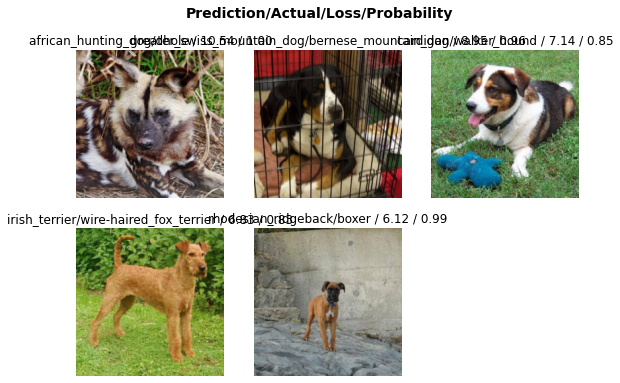

In [ ]:
interp.plot_top_losses(5)

In [ ]:
losses = interp.most_confused()
losses

[('eskimo_dog', 'siberian_husky', 6),
 ('collie', 'shetland_sheepdog', 3),
 ('english_foxhound', 'beagle', 3),
 ('irish_wolfhound', 'scottish_deerhound', 3),
 ('whippet', 'italian_greyhound', 3),
 ('kuvasz', 'great_pyrenees', 2),
 ('lhasa', 'shih-tzu', 2),
 ('malamute', 'siberian_husky', 2),
 ('shih-tzu', 'lhasa', 2),
 ('siberian_husky', 'eskimo_dog', 2),
 ('tibetan_terrier', 'lhasa', 2),
 ('walker_hound', 'english_foxhound', 2),
 ('airedale', 'lakeland_terrier', 1),
 ('american_staffordshire_terrier', 'chesapeake_bay_retriever', 1),
 ('american_staffordshire_terrier', 'staffordshire_bullterrier', 1),
 ('australian_terrier', 'norwich_terrier', 1),
 ('basenji', 'toy_terrier', 1),
 ('bernese_mountain_dog', 'greater_swiss_mountain_dog', 1),
 ('bloodhound', 'redbone', 1),
 ('bluetick', 'cocker_spaniel', 1),
 ('boston_bull', 'toy_terrier', 1),
 ('bouvier_des_flandres', 'newfoundland', 1),
 ('boxer', 'rhodesian_ridgeback', 1),
 ('brabancon_griffon', 'rhodesian_ridgeback', 1),
 ('briard', 'ca

In [ ]:
pd.Series([x[0] for x in losses], name = 'Incorrect').value_counts().head(10)

standard_poodle                   5
norfolk_terrier                   5
american_staffordshire_terrier    5
wire-haired_fox_terrier           4
golden_retriever                  4
german_shepherd                   4
english_foxhound                  4
rottweiler                        4
lhasa                             4
otterhound                        4
Name: Incorrect, dtype: int64

In [ ]:
labels.loc[labels.breed == 'standard_poodle']

,id,breed
274,068314c65cbe67fa4f57283f4f3a801c,standard_poodle
523,0cb5839c82f7c1286e55f260d4e608c4,standard_poodle
601,0eb00c6fc429ecc2cf8745a6334594ad,standard_poodle
899,160160c8ac562966448486906cb56308,standard_poodle
1086,1ae80c7e781d72681bc8e582a703919d,standard_poodle
...,...,...
9477,ed9c22ad21413691f548f5d72e7a76d9,standard_poodle
9541,ef22e67b6d82c04f2d17249e42769d35,standard_poodle
9663,f33c92eca07a03a242b4a9986fc66d9b,standard_poodle
9690,f3cf90e3a8a78d31850eca467122183a,standard_poodle


In [ ]:
test_path = Path('/content/test/')
tst_files = get_image_files(test_path)
tst_dl = dls.test_dl(tst_files)

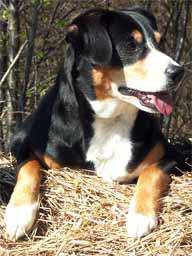

In [ ]:
Image.open(test_path.ls()[1])

In [ ]:
learn.dls.vocab[42]

'entlebucher'

In [ ]:
predictions = learn.get_preds(dl = tst_dl)[0]

In [ ]:
predictions = learn.tta(dl = tst_dl)[0]

In [ ]:
predictions

In [ ]:
tmp = predictions

In [ ]:
actual_preds = torch.argmax(predictions, axis=1)
actual_preds

tensor([10, 42, 89,  ...,  1, 65, 34])

In [ ]:
predictions[range(len(predictions)), actual_preds] = 1
actual_predictions = predictions.masked_fill(predictions != 1, 0)

In [ ]:
sub = pd.DataFrame(predictions.numpy())
sub.columns = learn.dls.vocab
sub.insert(0, column = 'id', value = [x.name[:-4] for x in test_path.ls()])

In [ ]:
sub.to_csv('submission.csv', index=False)

In [ ]:
!kaggle competitions submit -f /content/submission.csv -m something dog-breed-identification

100% 16.4M/16.4M [00:00<00:00, 25.6MB/s]
Successfully submitted to Dog Breed Identification

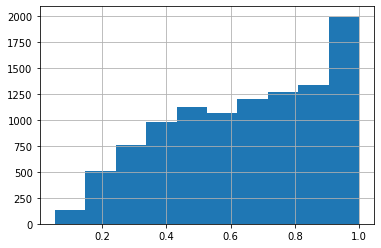

In [ ]:
import matplotlib.pyplot as plt
sub.max(axis = 1).hist()